Team Name: VVV

Team Member: Xinyu Wang

# Knowing better about our dataset

In [1]:
#Importing packages we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
from category_encoders import leave_one_out
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading data
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [3]:
#Checking basic information about our datasets
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
print('The number of colomns of out training set is :{}'.format(len(train_df.columns)))

The number of colomns of out training set is :81


In [5]:
train_df.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [6]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Checking information about our target variable: SalePrice
train_df['SalePrice'].describe()
#We can see that there is no value lower than 0, so it makes sense

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

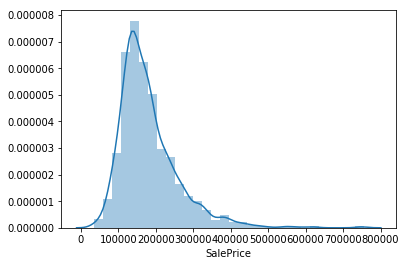

In [8]:
sns.distplot(train_df['SalePrice'], bins = 30, kde = True)

In [9]:
# From the plot we can see that the saleprice is skewed
print("Skewness: %f" % train_df['SalePrice'].skew())

Skewness: 1.882876


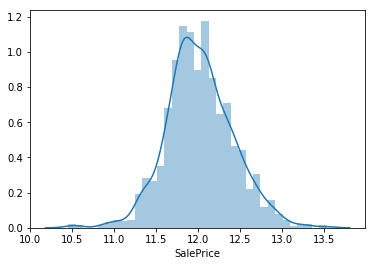

In [10]:
# Let's deal with this problem
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])
sns.distplot(train_df['SalePrice'])
# It is clear that it works better 

In [11]:
# Before further exploration, we can first deal with the ID variable which is not useful for us right now
test_df.drop('Id', axis = 1, inplace = True)
train_df.drop('Id', axis = 1, inplace = True)

In [12]:
print('The number of colomns of out training set now is :{}'.format(len(train_df.columns)))

The number of colomns of out training set now is :80


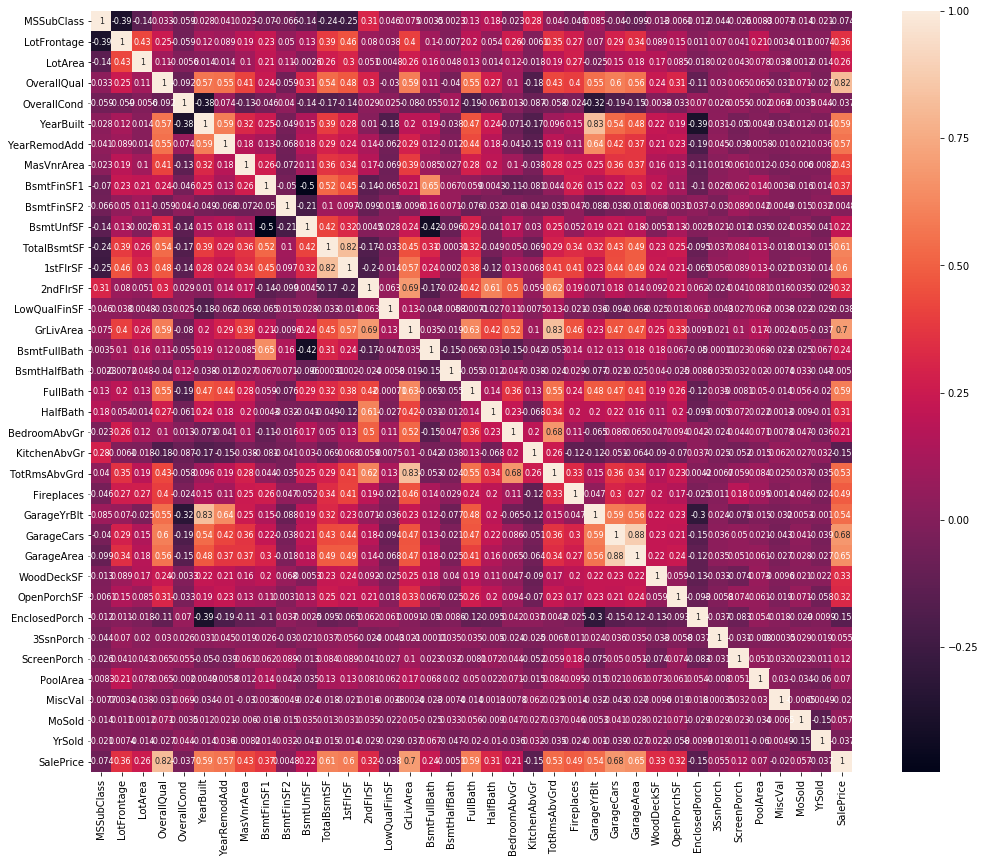

In [13]:
# Checking relationships between our targrt and those continuous variables
corr_matrix = train_df.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix,annot=True, annot_kws={"size": 8}, square=True)

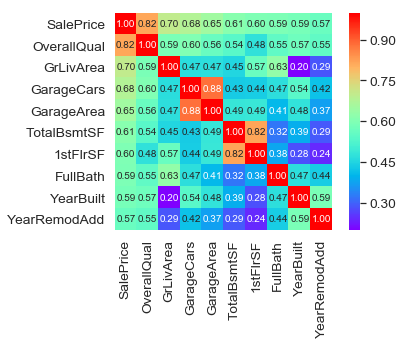

In [14]:
# Since this graph is too big and with too much data, 
# we can add more limitation and draw this graph again
cols = train_df.corr().nlargest(10, 'SalePrice')['SalePrice'].index
map = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(map, cbar=True, annot=True, \
                 square=True, fmt='.2f', \
                 annot_kws={'size': 10}, \
                 cmap = 'rainbow', \
                 yticklabels=cols.values, \
                 xticklabels=cols.values)
plt.show()

In [15]:
corr = train_df.corr()['SalePrice']
corr[np.argsort(corr, axis = 0)][::-1]

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

From the graph and data above, we can see that some variables are highly correalated so they may cause multilinearity, for example `GarageCars` and `GarageArea`. 

To deal with these variables, we decided to exclude some of them and only left part of the variables with highest relationship with our target.

In [16]:
# Further exploration
numeric_df = train_df.select_dtypes(include = ['float64', 'int64'])
numeric_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,12.429220


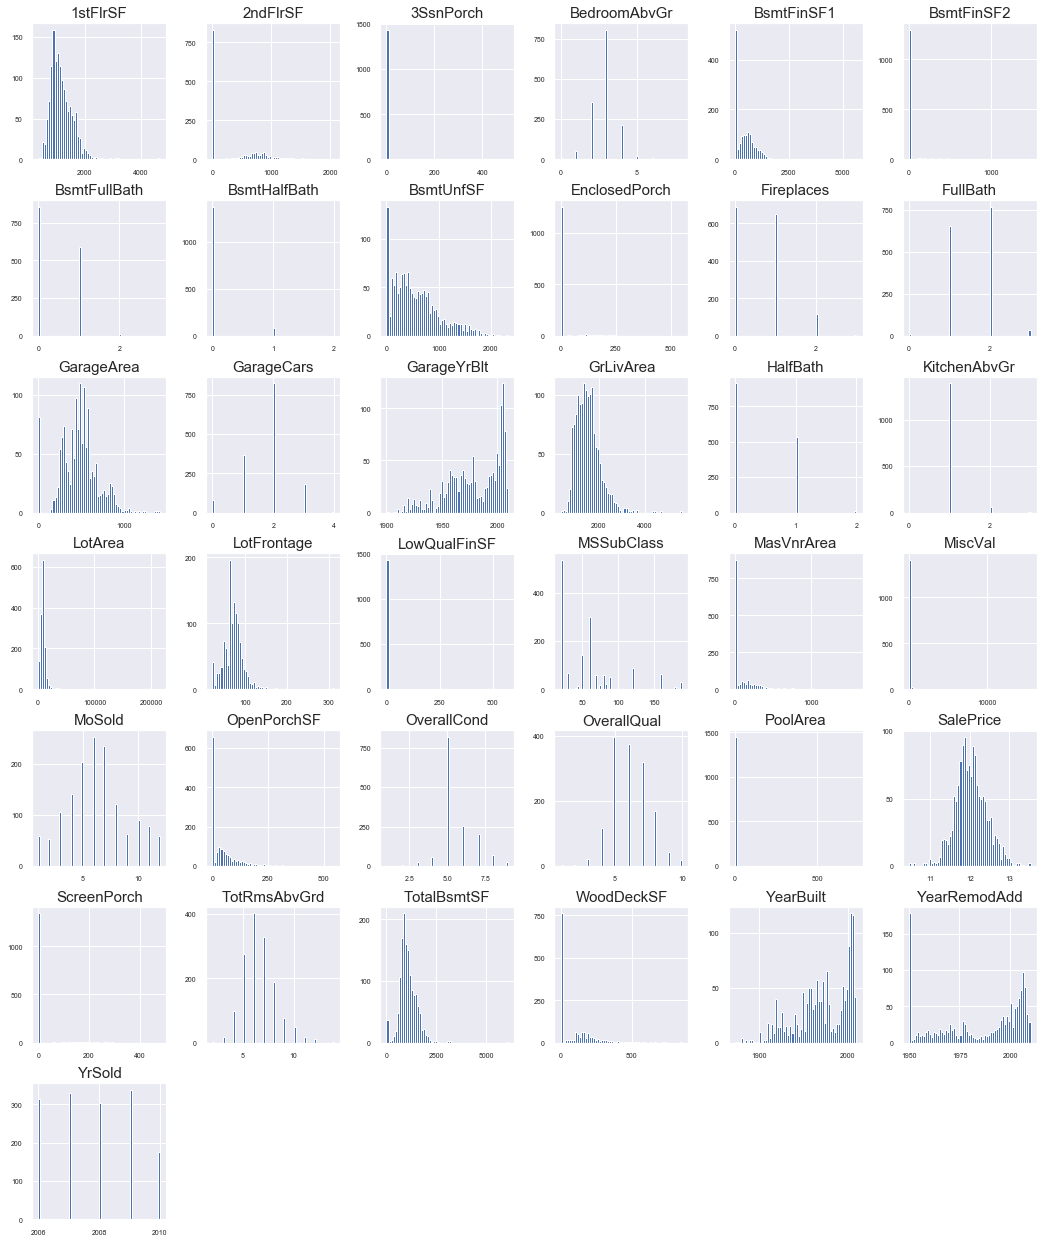

In [17]:
numeric_df.hist(figsize=(18, 22), bins=60, xlabelsize=7, ylabelsize=7)
plt.show()

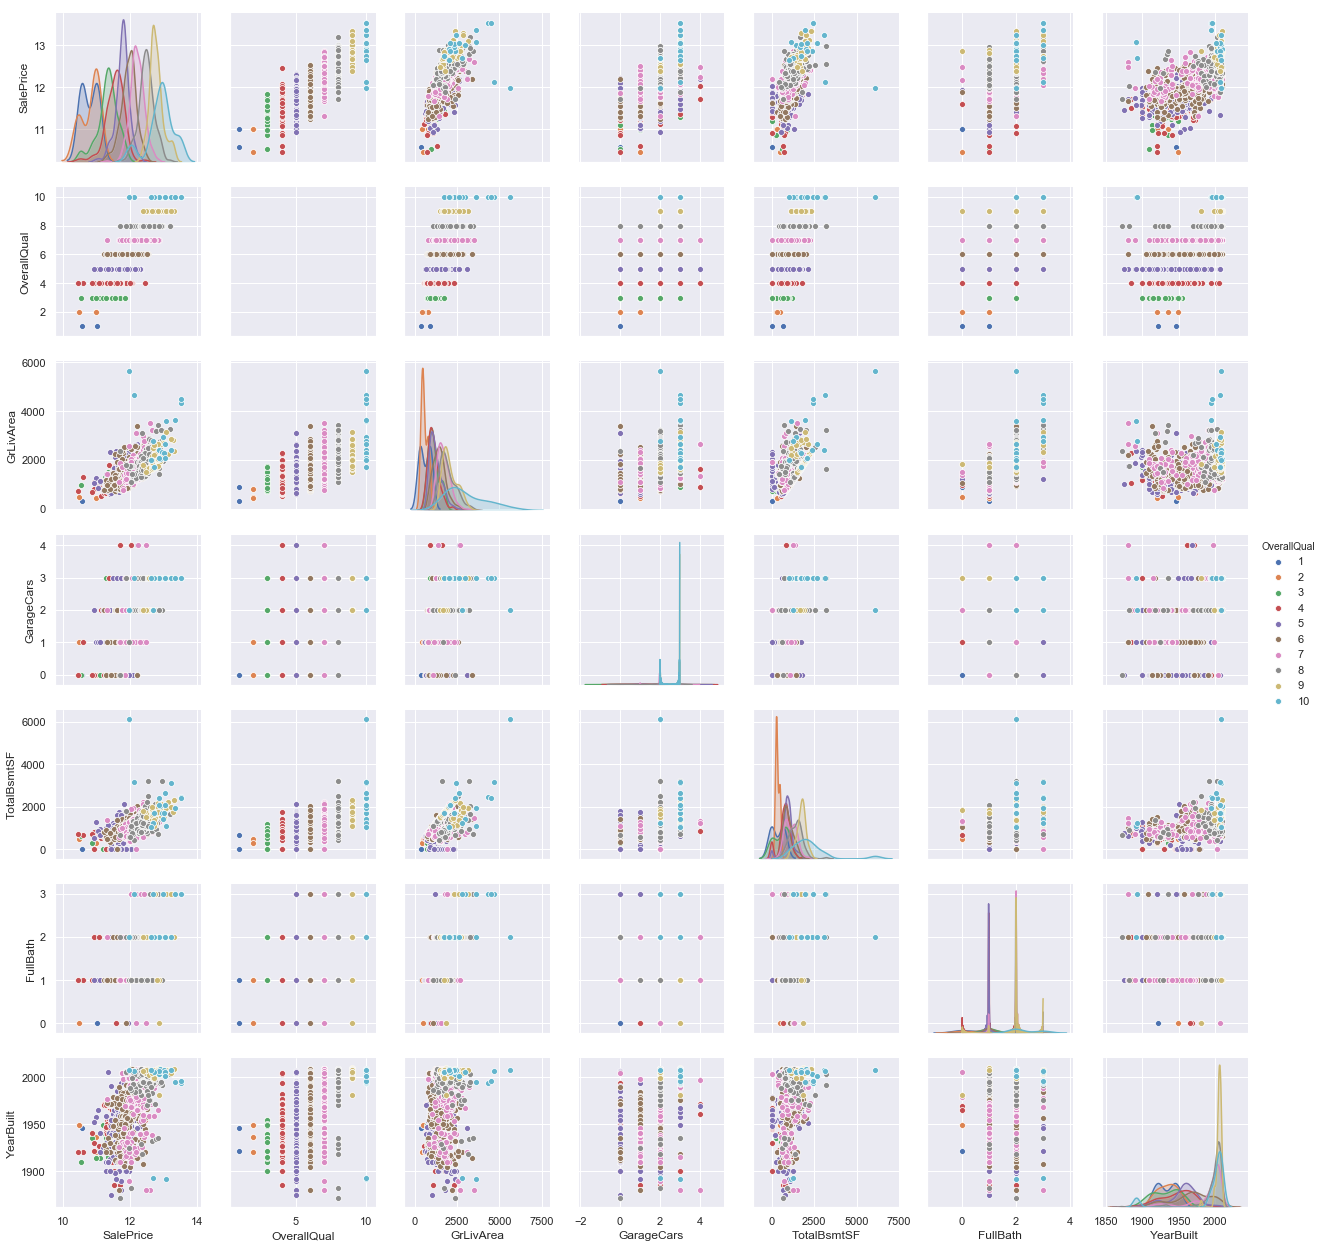

In [18]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5, hue = 'OverallQual')
plt.show()

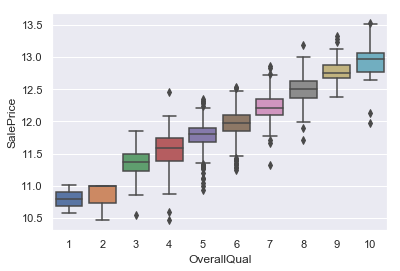

In [19]:
# Checking relationships between our target and some categorical variables
data = pd.concat([train_df['SalePrice'], train_df['OverallQual']], axis=1)
sns.boxplot(data['OverallQual'], y=data["SalePrice"], )
# We can see there exist a clear positive relationship between 'OverallQual' and 'SalePrice'

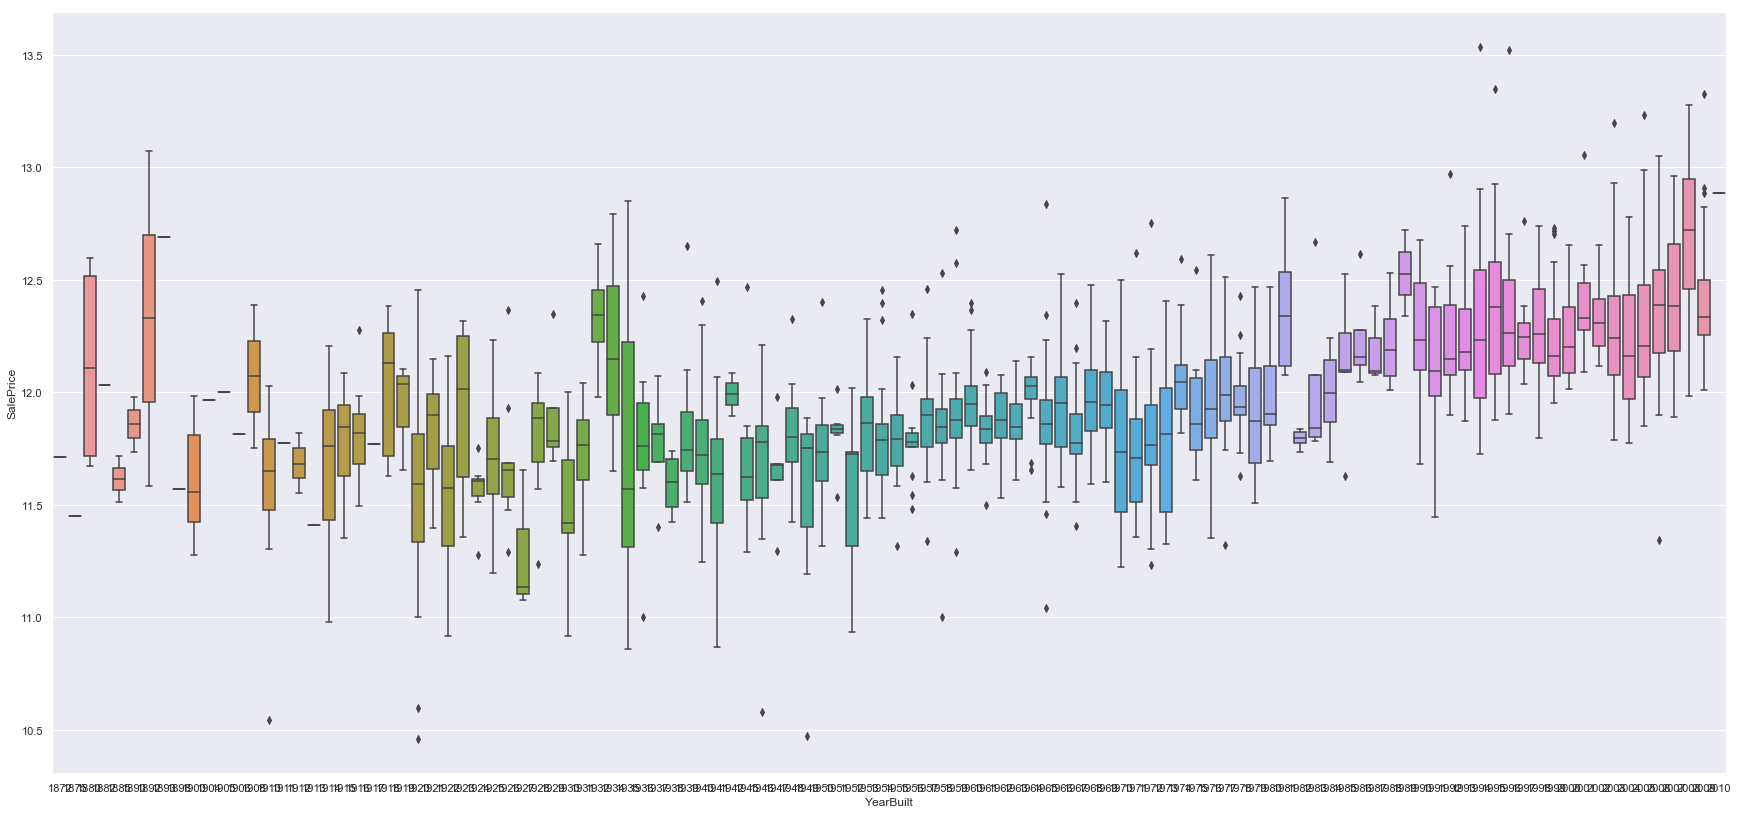

In [20]:
data = pd.concat([train_df['SalePrice'], train_df['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(30, 14))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)

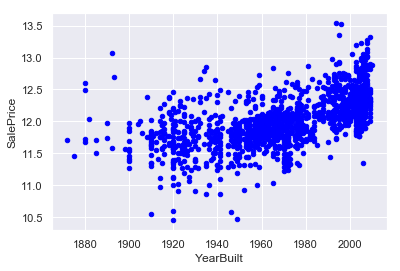

In [21]:
# Since we cannot find a clear pattern, we can try to use scatter plot
data.plot.scatter(x='YearBuilt', y="SalePrice", c='blue')
# We can see that there seems exist a positive relationship between SalePrice and YearBuilt

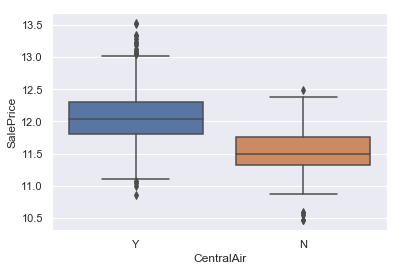

In [22]:
data = pd.concat([train_df['SalePrice'], train_df['CentralAir']], axis=1)
fig = sns.boxplot(x='CentralAir', y="SalePrice", data=data)
# We can see that houses with centralair have higher salesprice

In [23]:
df_not_num = train_df.select_dtypes(include = ['O'])

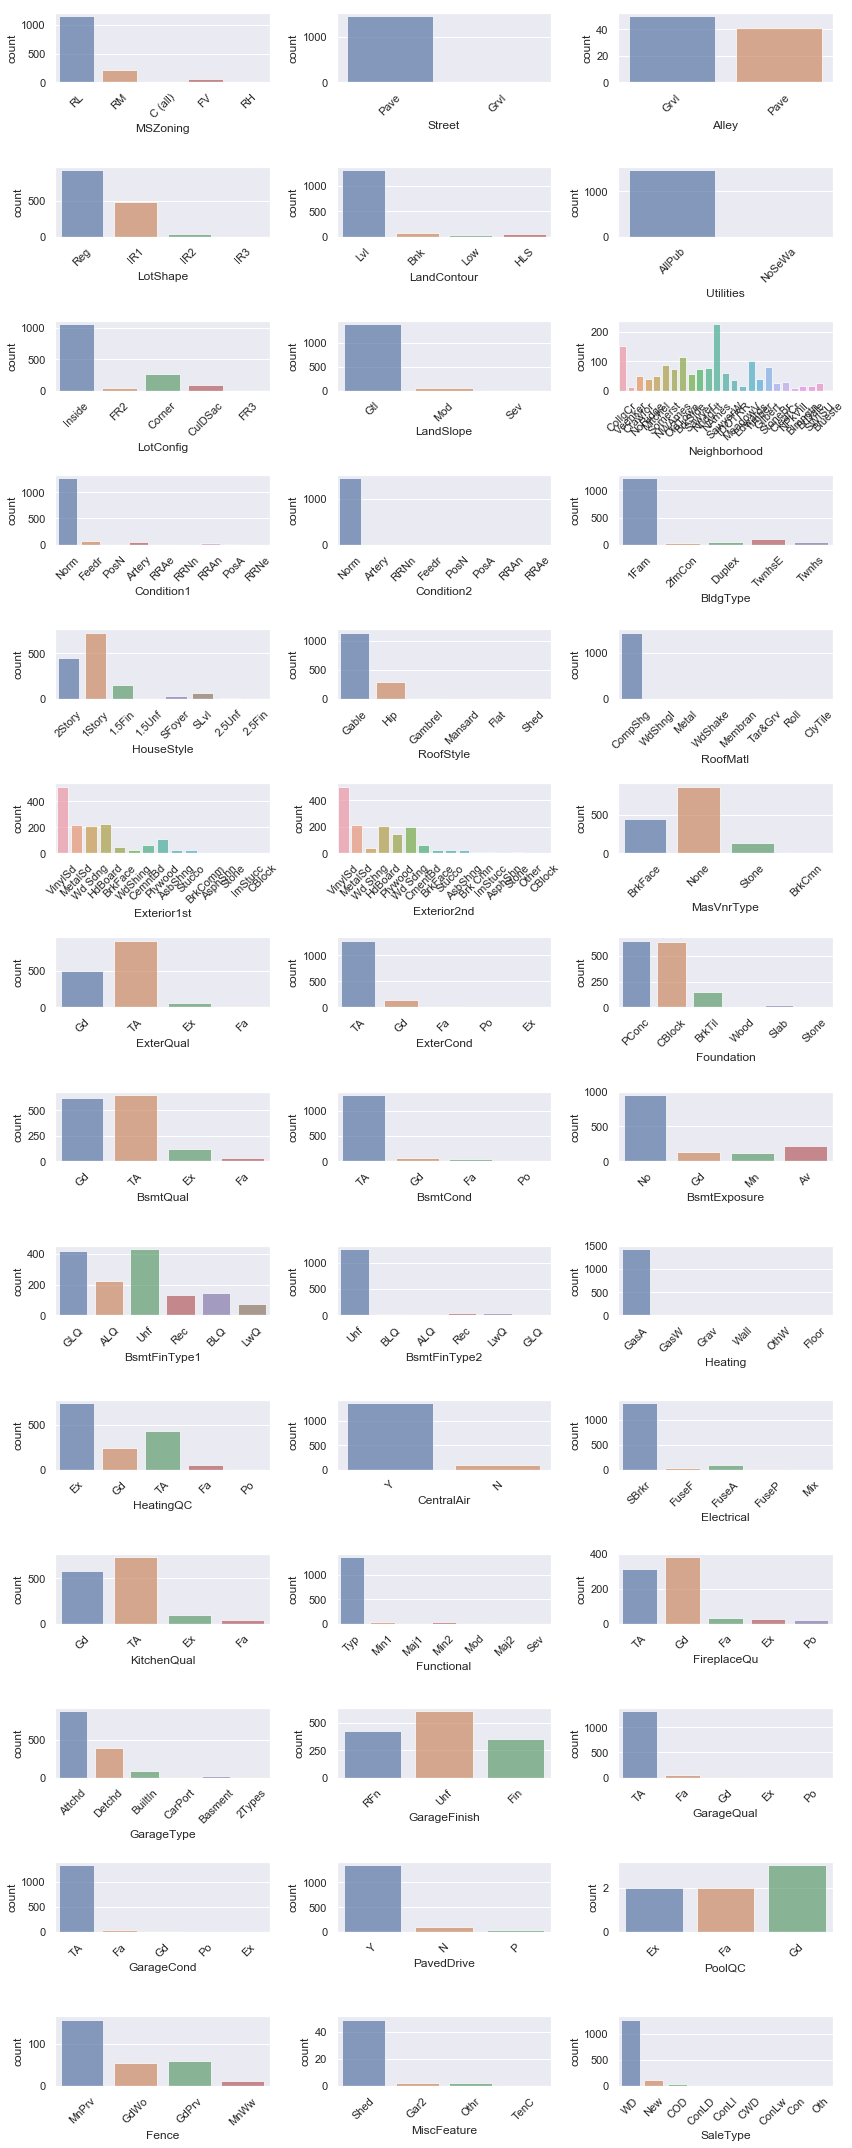

In [24]:
#Plot distribution of categorical features
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

# Data Preprocessing and Feature Engineering 

From the heat map above we can see that there are lots of features in this dataset and some of them are highly correlated, so we are going to drop highly correlated features to avoid multicolliearity.

In [25]:
# Reading data
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
# drop Id column, doesn't make sense to train Id.
test_id = test_df['Id']
train_id = train_df['Id']
test_df.drop('Id', axis = 1, inplace = True)
train_df.drop('Id', axis = 1, inplace = True)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
corr_matrix = train_df.corr().abs()
# Take the upper part of the correlation table
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Drop the columns which correlation value is greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
to_drop

['1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

Apprently we cannot drop `SalePrice` cause it is our target variable, so we pop it from the list and then drop the rest of columns.

In [27]:
to_drop.pop()
train_df = train_df.drop(to_drop, axis=1)
test_df = test_df.drop(to_drop, axis=1)

In [28]:
print(train_df.shape)
print(test_df.shape)

(1460, 71)
(1459, 70)


In [29]:
# Drop columns with too many null values
na_col = [column for column in train_df.columns if train_df[column].isna().sum() > 100]
train_df = train_df.drop(na_col, axis=1)
test_df = test_df.drop(na_col, axis=1)

print(train_df.shape)
print(test_df.shape)

(1460, 65)
(1459, 64)


From the distribution above we can see that in some features, some categories have dominated the dataset, so maybe these variables don't have much relationship with the houses' price. 

In [30]:
# Drop rows with null values
train_df = train_df.dropna()
test_df = test_df.dropna()

print(train_df.shape)
print(test_df.shape)

(1338, 65)
(1319, 64)


In [31]:
train_df.get_dtype_counts()

int64      26
object     38
float64     1
dtype: int64

In [32]:
# Encode all categorical variables with LeaveOneOut
X = train_df.drop(['SalePrice'], axis=1, inplace=False)
y = train_df['SalePrice']
enc = leave_one_out.LeaveOneOutEncoder().fit(X, y)

In [33]:
train = enc.transform(X, y)
test = enc.transform(test_df)

In [34]:
# Normalize the features
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(train)
train_norm = std_scale.transform(train)
training_norm_col = pd.DataFrame(train_norm, index=train.index, columns=train.columns) 
train.update(training_norm_col)
print (train.head())

   MSSubClass  MSZoning   LotArea    Street  LotShape  LandContour  Utilities  \
0    0.093701  0.380781 -0.218363  0.053992 -0.762687    -0.092981  -0.274637   
1   -0.876298  0.381776 -0.107067  0.059837 -0.761171    -0.091279   0.067636   
2    0.093701  0.380229  0.052620  0.050745  1.120431    -0.093927  -0.464789   
3    0.336201  0.383304 -0.111906  0.068820  1.128909    -0.088662   0.593723   
4    0.093701  0.379253  0.343926  0.045009  1.117740    -0.095599  -0.800724   

   LotConfig  LandSlope  Neighborhood  ...  OpenPorchSF  EnclosedPorch  \
0  -0.351320  -0.236308      0.208188  ...     0.202294      -0.349612   
1  -0.203642  -0.231988      1.008185  ...    -0.731311      -0.349612   
2  -0.352713  -0.238708      0.206382  ...    -0.088501      -0.349612   
3   0.051881  -0.225349      0.445409  ...    -0.195636       4.122511   
4  -0.348392  -0.242948      2.630824  ...     0.554309      -0.349612   

   3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  S

In [35]:
test_norm = std_scale.transform(test)
testing_norm_col = pd.DataFrame(test_norm, index=test.index, columns=test.columns) 
test.update(testing_norm_col)
print (test.head())

   MSSubClass  MSZoning   LotArea    Street  LotShape  LandContour  Utilities  \
0   -0.876298 -2.362402  0.088622  0.058654 -0.760548    -0.091535   0.000466   
1   -0.876298  0.381224  0.344604  0.058654  1.121712    -0.091535   0.000466   
2    0.093701  0.381224  0.302311  0.058654  1.121712    -0.091535   0.000466   
3    0.093701  0.381224 -0.070484  0.058654  1.121712    -0.091535   0.000466   
4    1.548700  0.381224 -0.551769  0.058654  1.121712     3.808479   0.000466   

   LotConfig  LandSlope  Neighborhood  ...  OpenPorchSF  EnclosedPorch  \
0  -0.348937  -0.232646     -0.664948  ...    -0.731311      -0.349612   
1   0.034659  -0.232646     -0.664948  ...    -0.180331      -0.349612   
2  -0.348937  -0.232646      0.106434  ...    -0.210941      -0.349612   
3  -0.348937  -0.232646      0.106434  ...    -0.180331      -0.349612   
4  -0.348937  -0.232646      2.160614  ...     0.523699      -0.349612   

   3SsnPorch  ScreenPorch  PoolArea    MiscVal    MoSold    YrSold  

# Multiple Linear regression 

In [207]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

# Check accuracy using k-fold cross validation
scores = cross_val_score(lin, train, y, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9986 (+/- 0.0048)


In [123]:
# Fit and predict
lin.fit(train, y)
predictions_lin = lin.predict(test)
predictions_lin

array([186260.10718395, 187121.95406264, 186677.92617643, ...,
       187267.15044669, 187708.37674874, 188544.51269816])

### The accuracy is already pretty good, but just for experimental purpose, we also tried to perform ridge and lasso.

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, cv=5)
ridge_regressor.fit(train, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [103]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
0.9986219829454259


In [104]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, cv=5) # scoring='neg_mean_squared_error'
lasso_regressor.fit(train, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 20}
0.9986647200673017


# Random forest

In [119]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Check accuracy using k-fold cross validation
scores = cross_val_score(rf, train, y, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9946 (+/- 0.0057)


In [121]:
# Fit and predict
rf.fit(train, y)
predictions_rf = rf.predict(test)
predictions_rf

array([188396.218, 188339.999, 188328.789, ..., 188407.539, 188416.049,
       188327.049])

# XGBoost

In [124]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.1, subsample=0.7)

# Check accuracy using k-fold cross validation
scores = cross_val_score(xgb, train, y, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9973 (+/- 0.0049)


In [125]:
# Fit and predict
xgb.fit(train, y)
predictions_xgb = xgb.predict(test)
predictions_xgb

array([186559.98, 186719.66, 187207.72, ..., 186278.5 , 186620.33,
       186459.84], dtype=float32)

# Write file to submit

In [186]:
# Build dataframe for the submission
# Using regression model, since it has the best accuracy. 
# Also tried with other models to submit, this one turns out to have better score.
sub = pd.DataFrame()
sub['Id'] = test_df.index + 1461
sub['SalePrice'] = predictions_lin

In [187]:
# These are the rows we dropped because of Nan value. 
# We add them with the average of the prediction.
missing = pd.DataFrame()
missing_id = list(set(test_id) - set(test_df.index + 1461))
avg_predict = sum(predictions_lin)/len(predictions_lin)
missing['Id'] = missing_id
missing['SalePrice'] = [avg_predict]*len(missing_id)

In [188]:
# Complete predictions
sub = sub.append(missing)
sub = sub.sort_values(by=['Id']).reset_index(drop=True)

In [189]:
# Write file
sub.to_csv('submission.csv',index=False)